In this file, we'll learn how the most fundamental data structures work. A data structure is an object that makes it possible to store data. Each data structure has a set of operations that we can perform on the data. At the very least, a data structure should allow a user to add and retrieve data.

These are the data structures we'll cover in this file:

* Lists
* Stacks
* Queues
* Dictionaries

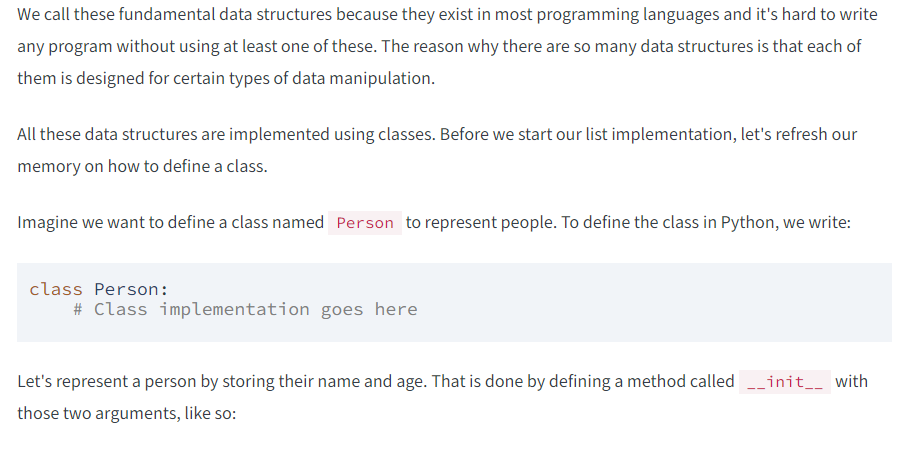

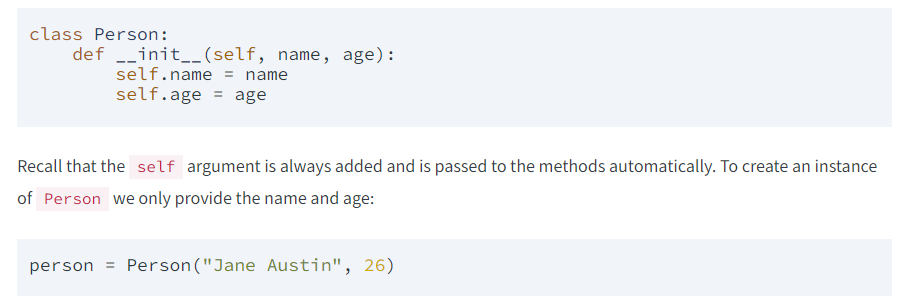

**Task**

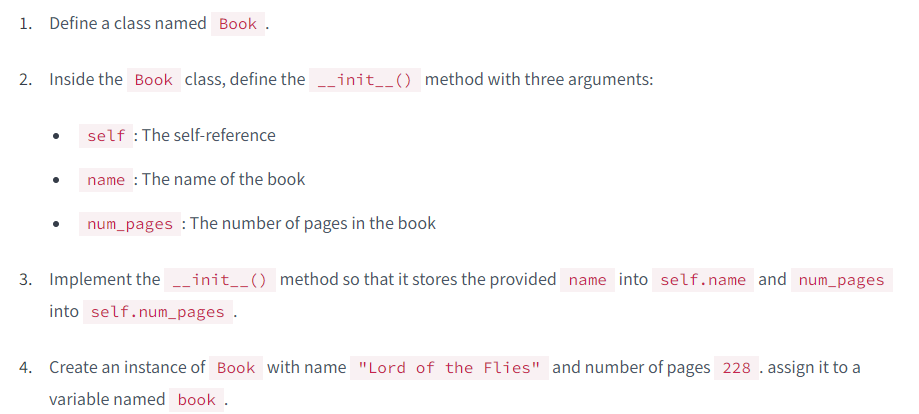

**Answer**

In [1]:
class Book:
    
    def __init__(self, name, num_pages):
        self.name = name
        self.num_pages = num_pages
    
book = Book("Lord of the Flies", 228)

We've learned that Python lists are implemented using an array.

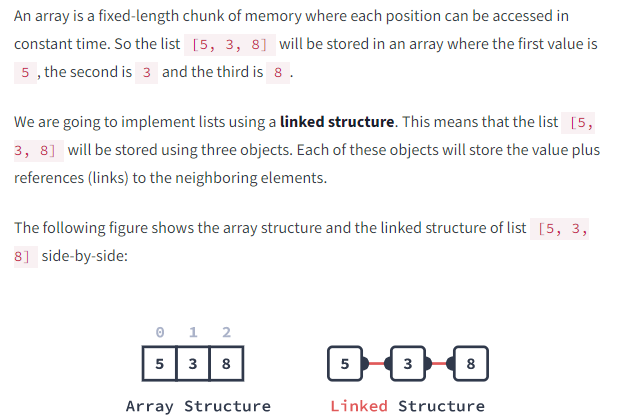

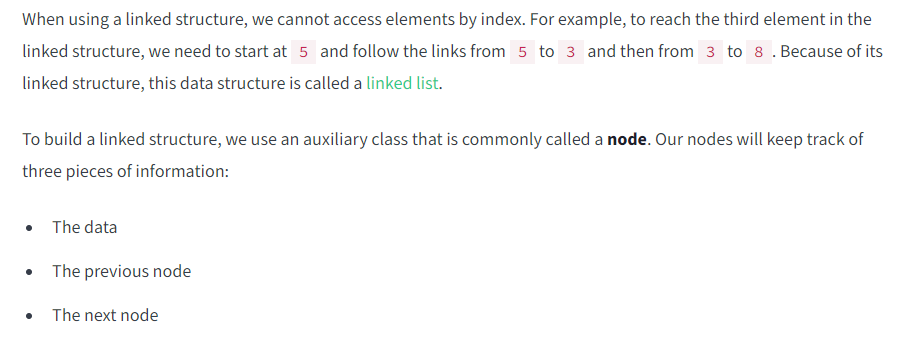

Throughout this file, we use the following visual representation of nodes:

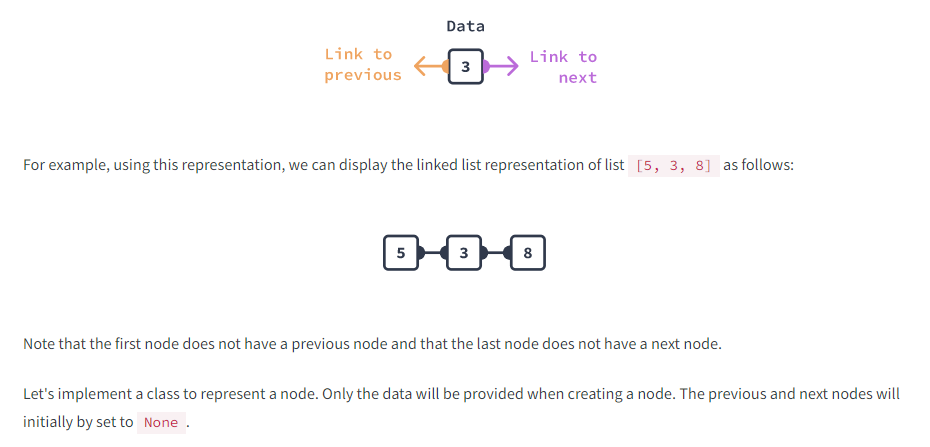

**Task**

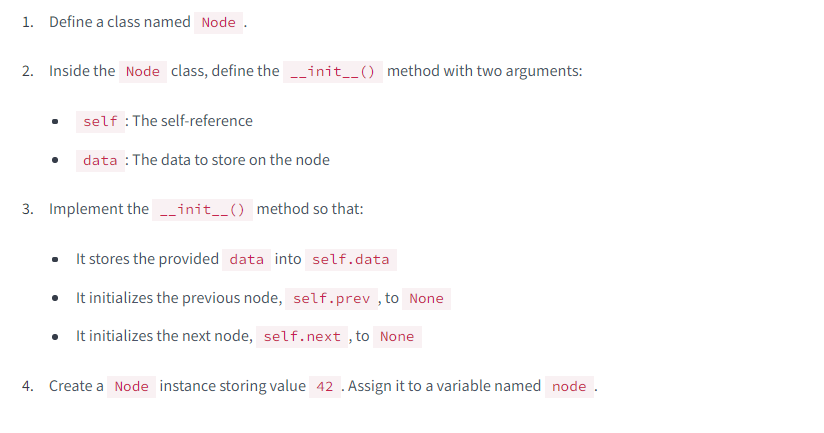

**Answer**

In [2]:
class Node:
    
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None
        
node = Node(42)

Abvoe, we implemented a class to represent nodes in a linked list. An individual node can be used to store one list element via its `Node.data` attribute. Using the `Node.next` attribute, nodes can be linked together to form a list.

The `Node.prev` attribute will store the predecessor of each node. A linked list with predecessor links is called a [doubly linked list](https://en.wikipedia.org/wiki/Doubly_linked_list). This is not strictly necessary for implementing a linked list. We'll see in the next two files that having predecessor links is very convenient.

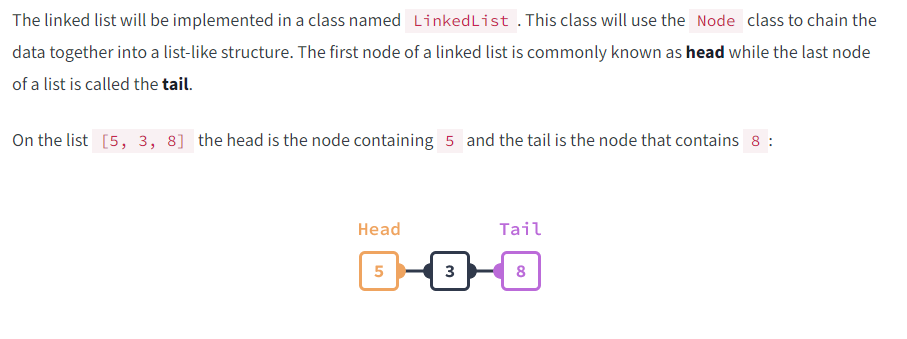

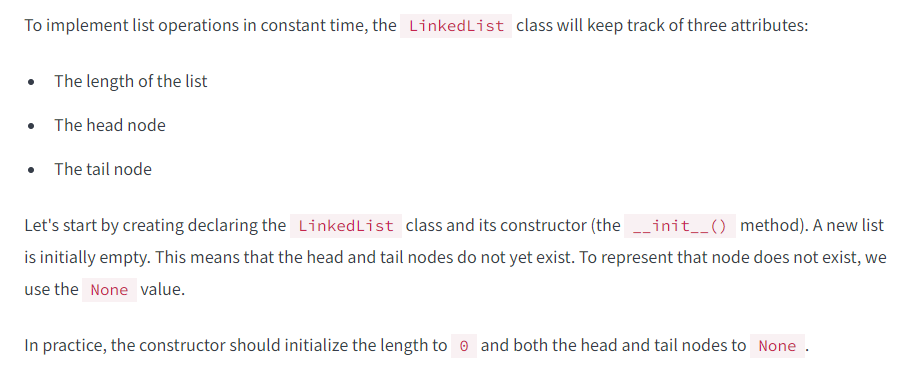

**Task**

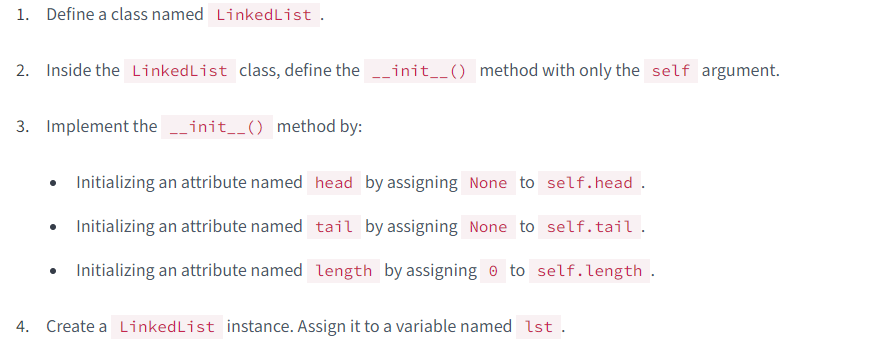

**Answer**

In [3]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

lst = LinkedList()

Now we'll start to implement functionality into our linked list. More specifically, we are going to implement a method to append a new value to the list.

Observe that in a list with a single element, both the head and the tail point to the same node:

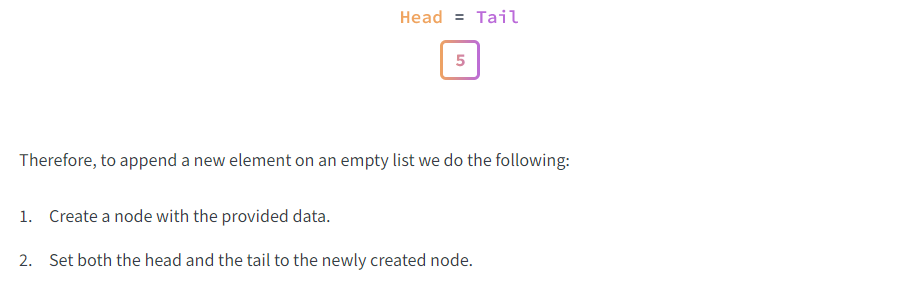

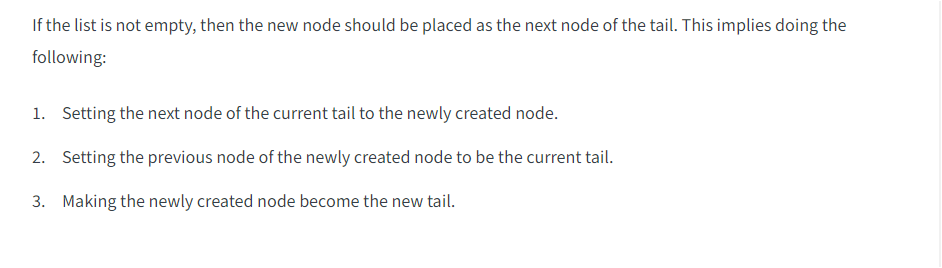

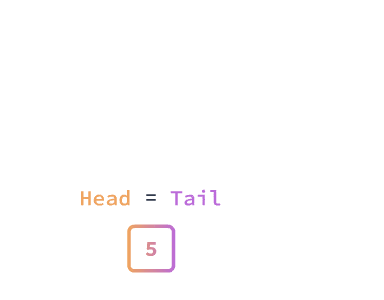

In [4]:
from IPython.display import Image

Image("4.2-m560.gif")

Let's implement the append method.

**Task**

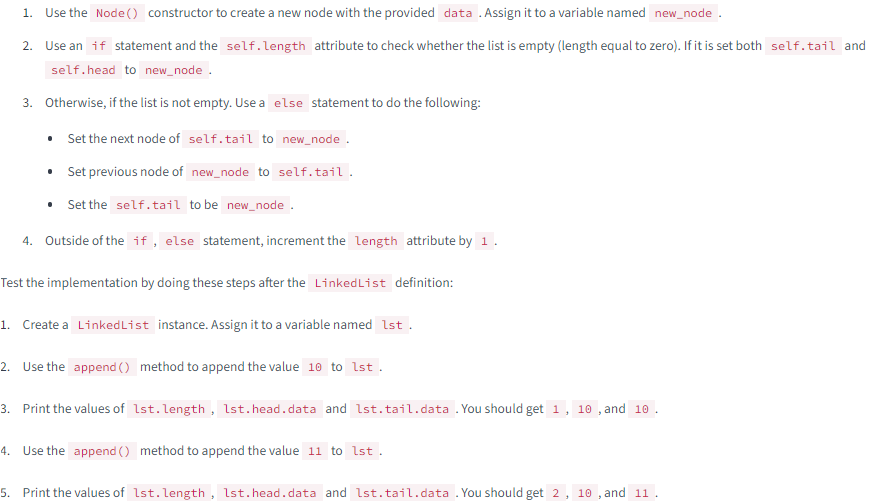

**Answer**

In [5]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    # Implement append() method here
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1

# Test implementation
lst = LinkedList()

lst.append(10)
print(lst.length, lst.head.data, lst.tail.data)

lst.append(11)
print(lst.length, lst.head.data, lst.tail.data)

1 10 10
2 10 11


Above, we've learned how to implement a method to append elements to a list. But this is not useful if we cannot easily access list elements. To access list elements, we are going enable using `for` loops to iterate over all elements in a list.

When implementing a class, `for` loops are not automatically available. We need to specify what it means to iterate over the class. In other words, we need to make our class an [iterable](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Iterables.html#:~:text=Definition%3A,over%20in%20a%20for%2Dloop.).

For example, with the `Person` class defined earlier, we cannot write `for x in person` if `person` is a `Person` instance. In the same way, we cannot (yet) write `for x in lst` where `lst` is a `LinkedList` instance.

We can iterate over our linked list by starting at the head of the list and following the links to the next nodes until we reach the tail. Here's an animation showing this:

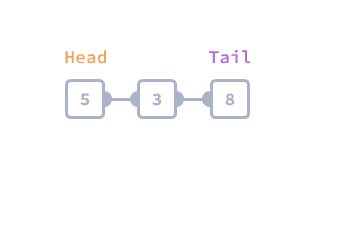

In [6]:
Image("5.1,6.1-m560.gif")

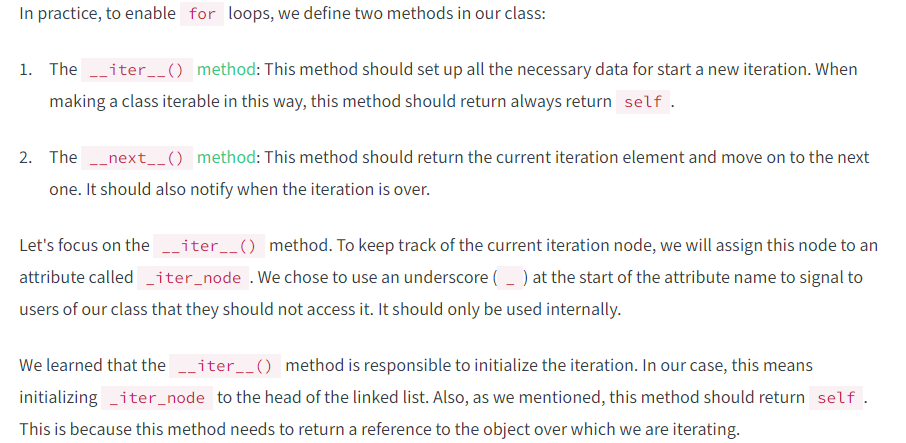

Let's implement this. Note that by itself it does not allow us to use `for` loops.

**Task**

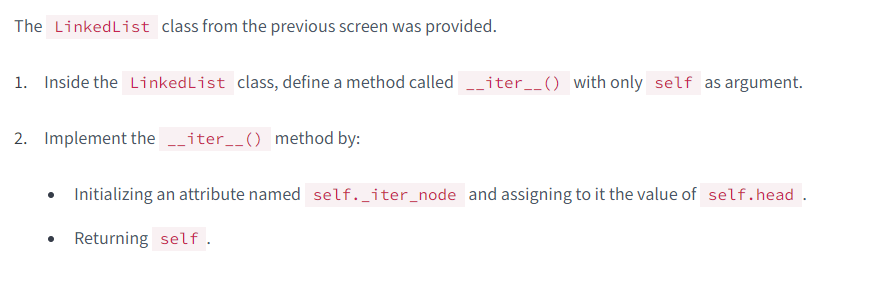

**Answer**

In [7]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    # Implement __iter__() method here
    def __iter__(self):
        self._iter_node = self.head
        return self

Above we've started making our linked list into an iterable. An iterable is an object over which we can iterate using a `for` loop. Let's see again the animation of how the iteration will work:

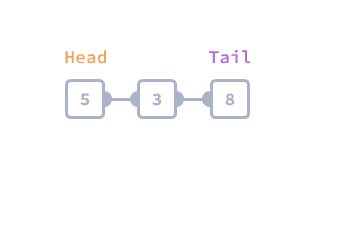

In [8]:
Image("5.1,6.1-m560.gif")

Earlier we implemented the `__iter__()` method which is responsible for initializing the iteration. We did it by creating an attribute named `_iter_node` and setting it to the head of the list. The following figure illustrates the state after the iteration is initialized on list `[5, 3, 8]`:

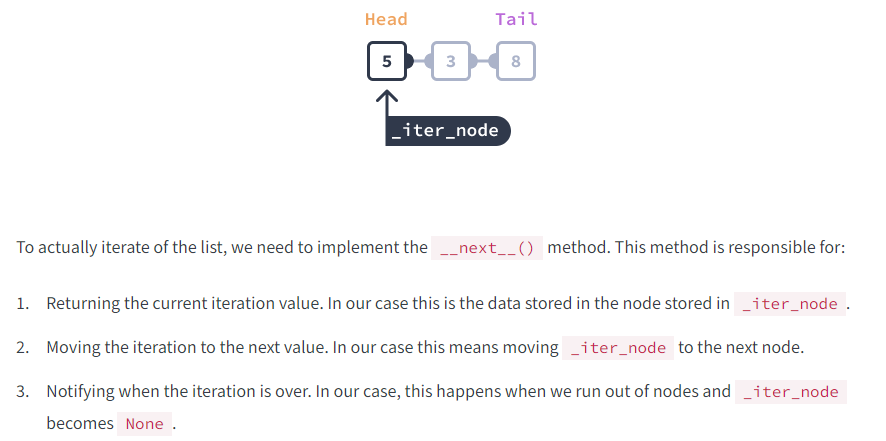

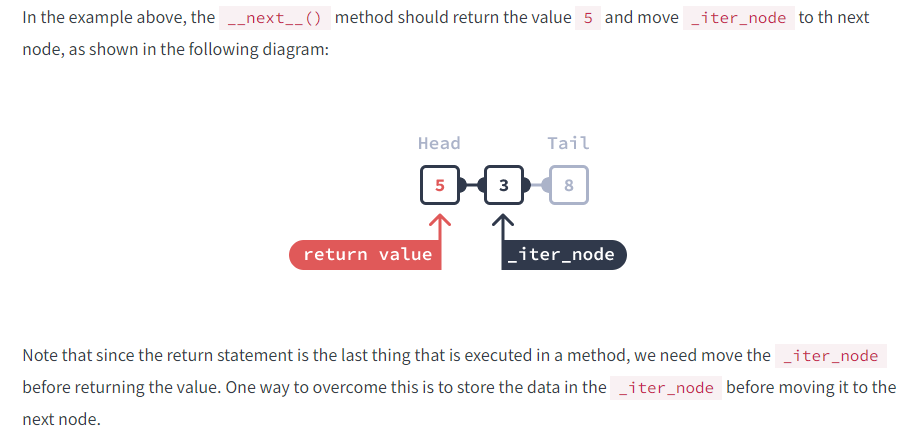

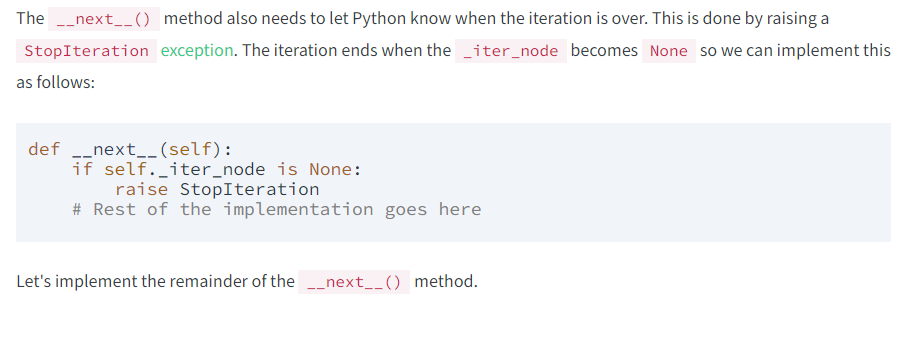

**Task**

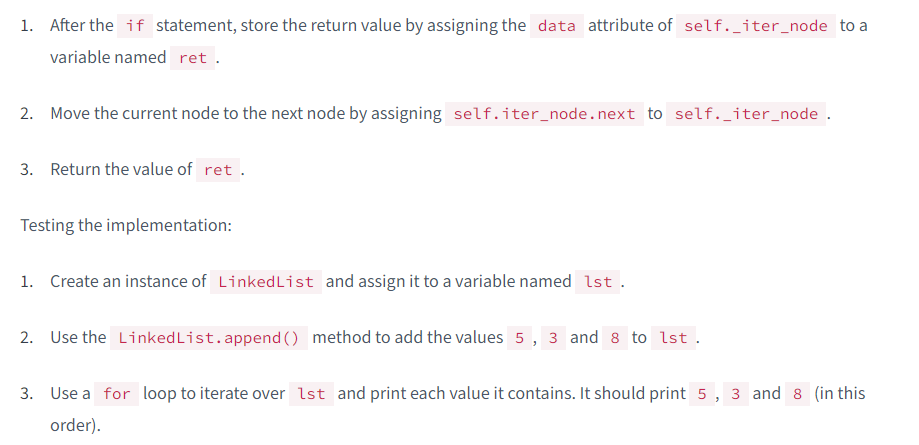

**Answer**

In [9]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self
    
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        # Rest of the implementation goes here
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
# Testing the implementation
lst = LinkedList()
lst.append(5)
lst.append(3)
lst.append(8)
for value in lst:
    print(value)

5
3
8


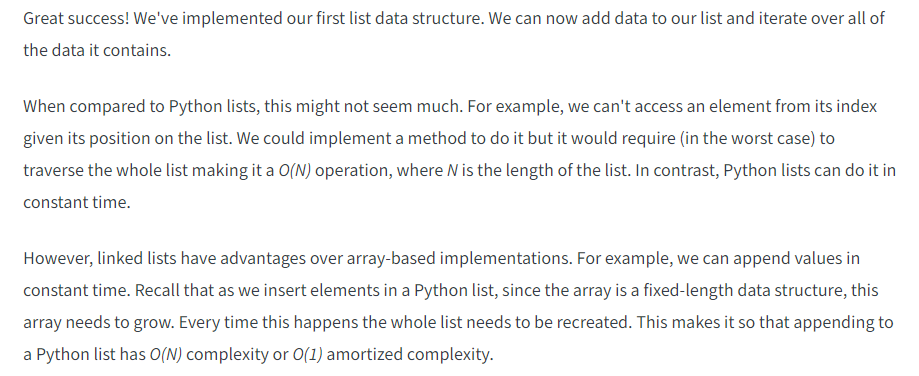

Another thing that we can do with a linked list is to prepend elements in constant time, that is, adding an element to the start of the list. Here's an animation describing the steps for doing this:

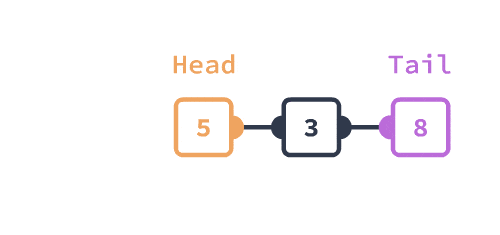

In [10]:
Image("7.1-m560.gif")

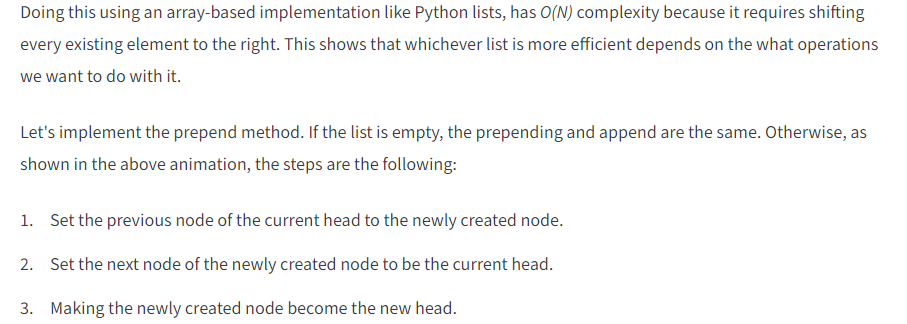

**Task**

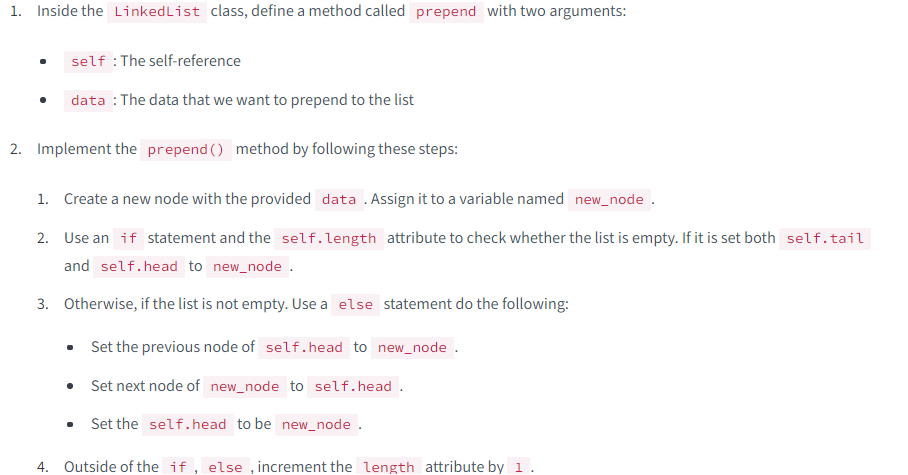

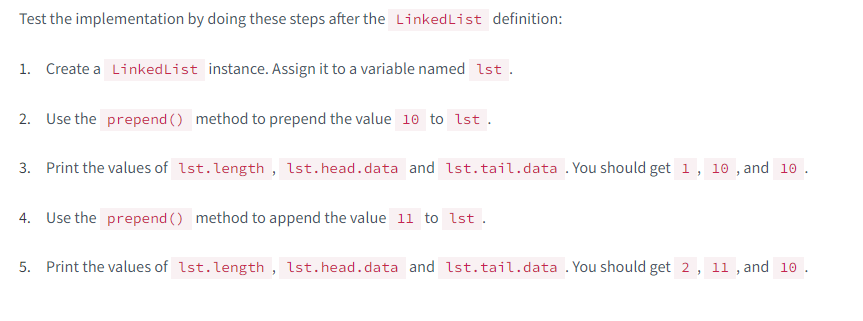

**Answer**

In [11]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self 
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
    # Add method here
    def prepend(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.head.prev = new_node
            new_node.next = self.head
            self.head = new_node
        self.length += 1

# Test implementation
lst = LinkedList()

lst.prepend(10)
print(lst.length, lst.head.data, lst.tail.data)

lst.prepend(11)
print(lst.length, lst.head.data, lst.tail.data)

1 10 10
2 11 10


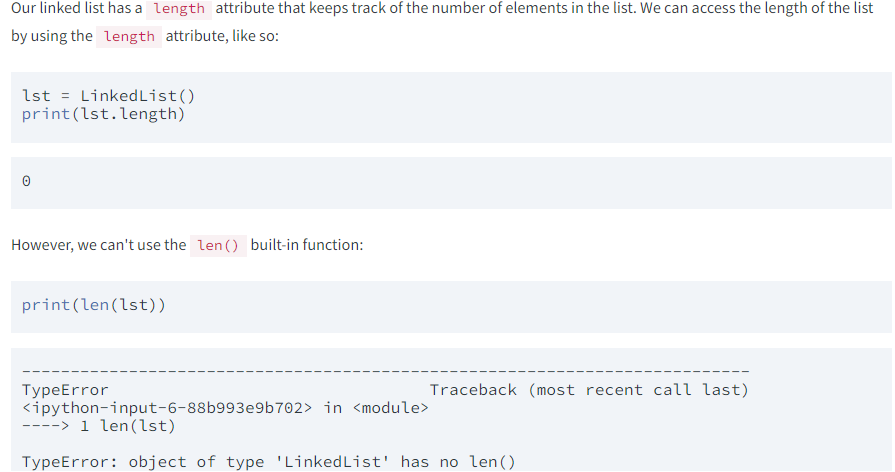

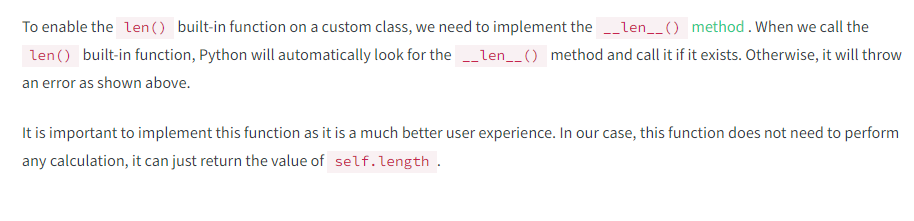

**Task**

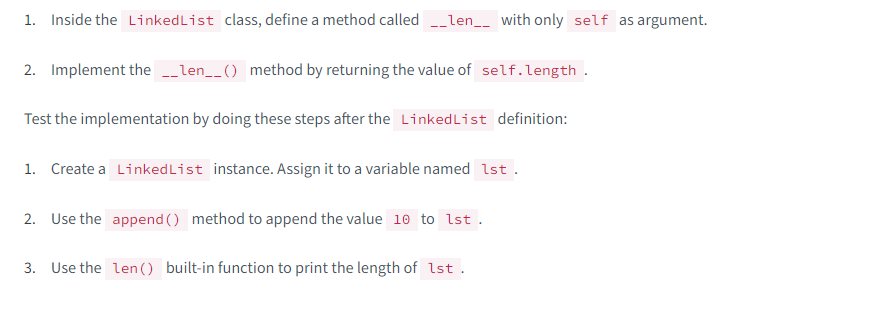

**Answer**

In [12]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self 
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
    def prepend(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.head.prev = new_node
            new_node.next = self.head
            self.head = new_node
        self.length += 1
        
    # Add __len__() method here
    def __len__(self):
        return self.length

# Test implementation
lst = LinkedList()
lst.prepend(10)
print(len(lst))

1


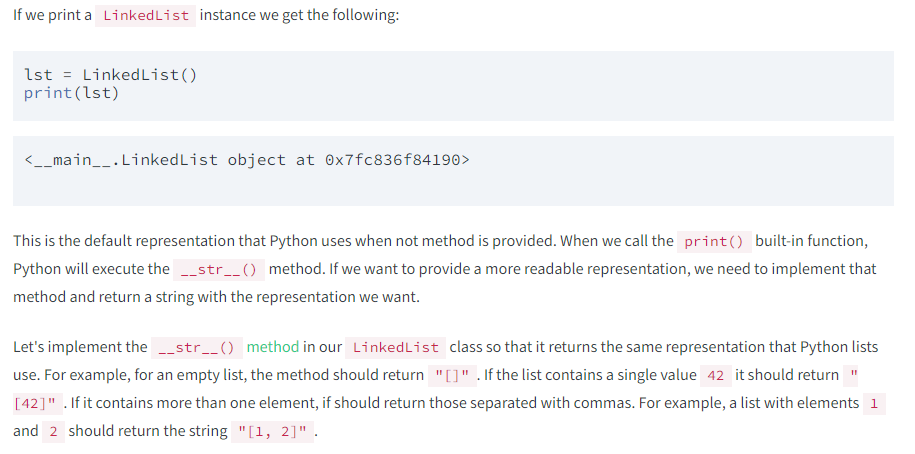

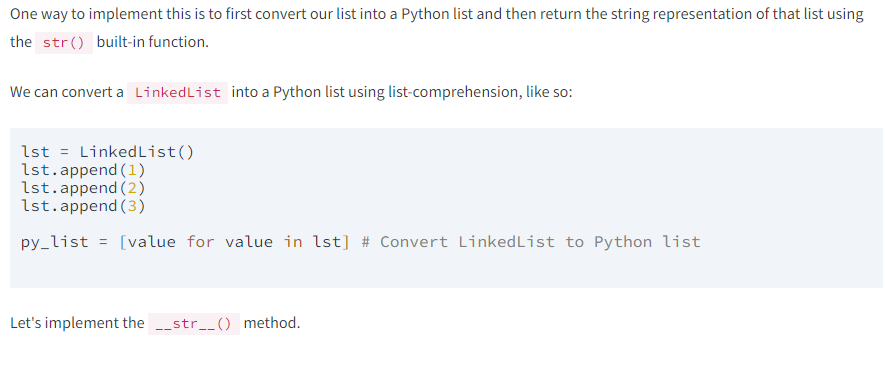

**Task**

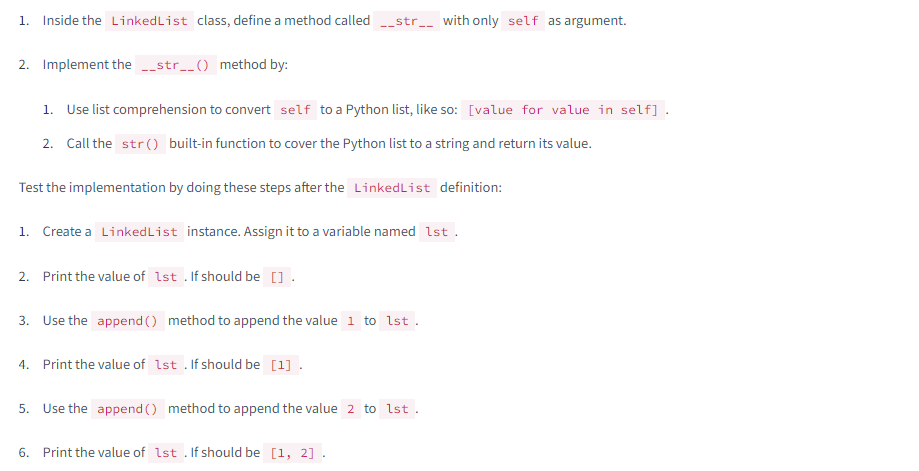

**Answer**

In [13]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self 
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
    def prepend(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.head.prev = new_node
            new_node.next = self.head
            self.head = new_node
        self.length += 1
        
    def __len__(self):
        return self.length
    
    # Add __str__() method here
    def __str__(self):
        return str([value for value in self])

# Test implementation
lst = LinkedList()
print(lst)

lst.append(1)
print(lst)

lst.append(2)
print(lst)

[]
[1]
[1, 2]


In this file, we've learned how to implement a list using a linked structure. Linked lists are better that array-based implementations when we don't need to access elements by index. Their operations run in constant time.

In the next file, we'll implement Queues.